<a href="https://colab.research.google.com/github/Ben-Judas/Customer-Churn-Analysis/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHURN ANALYSIS

## Context:
The leading telecom company has a massive market sharebut one big problem: several rivalsthat are constantly trying to steal customers.  Becausethis company has been the marketleader for so many years, there are not significant opportunities to grow with new customers. Instead, company executives have decided to focuson their churn: the rate at which they lose customers.

They have two teams especially interested in thisdata: the marketing team and the customer service team.  Each team has its own reason for wantingthe analysis. The marketing teamwants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.
They decide to hire you for two tasks:

    1. Help them identify the types of customers who churn
    2. Predict who of their current customers will churnnext month.To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn columnwill say Yes if the customer churned in the past month.The data also offers demographic dataand data on the services that each customer purchases.Finally there is information on thepayments those customers make.
    
## Deliverables
Tell a story to themarketing team to help them understand the customerswho churn and what the marketingteam can do to prevent it. Highlight the informationwith helpful visualizations.

    1.How much is churn affecting the business? How bigis churn compared to the existingcustomer base?
    2.Explain churn by the below categories. Are there anyfactors that combine to beespecially impactful
    
        a.Customer demographics like age and gender
        b.Services used
        c.Billing information
    3.What services are typically purchased by customerswho churned? Are any services 
    especially helpful in retaining customers?
    4.Bonus!How long will it take for the company to loseall its customers?  Which demographics will they lose first?
bold text

In [568]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EXPLORATORY DATA ANALYSIS (EDA)





# 1 - PACKAGES AND DATA IMPORT

## 1.1 - Packages

In [569]:
# Packages for data manipulation

import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for machine learning

## 1.2 - Reading Data

In [570]:
# import and read the file from a local host
df = pd.read_csv("Telco-Customer-Churn.csv")

# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn BA Project/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# display the head of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2 - DATA CLEANING

##2.1 Data Checking

In [571]:
# shape of the dataset
df.shape

(7043, 21)

In [572]:
# columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [573]:
# Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [574]:
# display the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [575]:
# verify there are no duplicated values
df.customerID.nunique()

7043

In [576]:
# count column values
col_dicts ={}
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6531
Churn = 2


In [577]:
# display values of categorical columns
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [578]:
df.SeniorCitizen.unique()

array([0, 1])

In [579]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [580]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [581]:
# display values of tenure columns
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [582]:
# categorical function for tenure columns
def tenure_cat(x, errors = "coerce"):
  if x < 12:
    return '-12 month'
  if 13 < x <= 24:
    return '13-24 month'
  if 25 < x <= 36:
    return '25-36 month'
  if 37 < x <= 48:
    return '37-48 month'
  if x > 48:
    return '+48 month'

In [583]:
# apply the tenure function
df['tenure']=df['tenure'].apply(tenure_cat)

In [584]:
# change the category of tenure
df['tenure']=df['tenure'].astype('category')

In [585]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [586]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [587]:
# convert to TotalCharges to numerical type
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors = "coerce")

In [588]:
for col in df.iloc[:,1:].columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')


In [589]:
# phone service, internet service, online security, online backup, deviceprotection,
#tech support, streaming tv, streming movies, contract, monthly charge, total charge
# papeerless billing, monthly charges, total charges.
# df["PhoneService"] = df["PhoneService"].replace({1:"Yes", 0: "No"})

In [590]:
# make changes in a new column
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
df.replace('DSL', 'Yes', inplace=True)
df.replace('Fiber optic', 'Yes', inplace=True)
df["PhoneService"] = df["PhoneService"].replace({1:'Yes', 0:'No'})
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:'Yes', 0:'No'})

In [591]:
# df["PhoneService"] = df["PhoneService"].replace({1:'Yes', 0:'No'})

In [592]:
# count column values
col_dictio ={}
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 5
PhoneService = 2
MultipleLines = 2
InternetService = 2
OnlineSecurity = 2
OnlineBackup = 2
DeviceProtection = 2
TechSupport = 2
StreamingTV = 2
StreamingMovies = 2
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6530
Churn = 2


In [593]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [594]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,-12 month,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,25-36 month,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,-12 month,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,37-48 month,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,-12 month,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [595]:
service = ['customerID','SeniorCitizen', 'PhoneService', 'MultipleLines',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies', 'Churn']
customer=['customerID','gender', 'Partner', 'Dependents', 'PaymentMethod', 'Contract','tenure','Churn']
billing=['customerID','MonthlyCharges','TotalCharges','Churn']

In [596]:
cosservice = ['SeniorCitizen', 'PhoneService', 'MultipleLines',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies']
customerchar=['gender', 'Partner', 'Dependents', 'PaymentMethod', 'Contract','tenure']
billingcharges=['MonthlyCharges','TotalCharges']

In [597]:
# service subset
df[service].head()

,customerID,SeniorCitizen,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,No,No,No,No,Yes,No,No,No,No,No
1,5575-GNVDE,No,Yes,No,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,No,Yes,No,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,No,No,No,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,No,Yes,No,No,No,No,No,No,No,Yes


In [598]:
# customer subset
df[customer].tail()

,customerID,gender,Partner,Dependents,PaymentMethod,Contract,tenure,Churn
7038,6840-RESVB,Male,Yes,Yes,Mailed check,One year,13-24 month,No
7039,2234-XADUH,Female,Yes,Yes,Credit card (automatic),One year,+48 month,No
7040,4801-JZAZL,Female,Yes,Yes,Electronic check,Month-to-month,-12 month,No
7041,8361-LTMKD,Male,Yes,No,Mailed check,Month-to-month,-12 month,Yes
7042,3186-AJIEK,Male,No,No,Bank transfer (automatic),Two year,+48 month,No


In [599]:
# billing subset
df[billing].head()

,customerID,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,29.85,29.85,No
1,5575-GNVDE,56.95,1889.50,No
2,3668-QPYBK,53.85,108.15,Yes
3,7795-CFOCW,42.30,1840.75,No
4,9237-HQITU,70.70,151.65,Yes


# 3. DESCRIPTIVE ANALYSIS

## Impact of churn customer on business

# 3.1 Descriptive Analysis of customer characteristics

In [656]:
for col in df[customerchar].columns :
  print(f'\n\nDistribution of Customer by {col}')
  display(np.round(df[col].value_counts(normalize=True).reset_index(),2))



Distribution of Customer by gender


,index,gender
0,Male,0.5
1,Female,0.5




Distribution of Customer by Partner


,index,Partner
0,No,0.52
1,Yes,0.48




Distribution of Customer by Dependents


,index,Dependents
0,No,0.7
1,Yes,0.3




Distribution of Customer by PaymentMethod


,index,PaymentMethod
0,Electronic check,0.34
1,Mailed check,0.23
2,Bank transfer (automatic),0.22
3,Credit card (automatic),0.22




Distribution of Customer by Contract


,index,Contract
0,Month-to-month,0.55
1,Two year,0.24
2,One year,0.21




Distribution of Customer by tenure


,index,tenure
0,+48 month,0.34
1,-12 month,0.31
2,13-24 month,0.14
3,25-36 month,0.11
4,37-48 month,0.10


In [670]:
churn_by_billing=df[billing].groupby(['Churn']).sum('MonthlyCharges').reset_index()
display(churn_by_billing)

,Churn,MonthlyCharges,TotalCharges
0,No,316985.75,13193241.8
1,Yes,139130.85,2862926.9


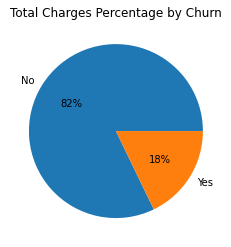

In [671]:
plt.pie(churn_by_billing['TotalCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Total Charges Percentage by Churn")
plt.savefig("Total Charges Percentage by Churn.png")
plt.show()

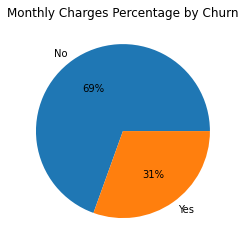

In [672]:
plt.pie(churn_by_billing['MonthlyCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Monthly Charges Percentage by Churn")
plt.savefig("Monthly Charges Percentage by Churn.png")
plt.show()

# 3.3 Descriptive Analysis of Services

In [654]:
for col in df[cosservice].columns :
  print(f'\n\nDistribution of Customer by {col}')
  display(np.round(df[col].value_counts(normalize=True).reset_index(),2))



Distribution of Customer by SeniorCitizen


,index,SeniorCitizen
0,No,0.84
1,Yes,0.16




Distribution of Customer by PhoneService


,index,PhoneService
0,Yes,0.9
1,No,0.1




Distribution of Customer by MultipleLines


,index,MultipleLines
0,No,0.58
1,Yes,0.42




Distribution of Customer by OnlineSecurity


,index,OnlineSecurity
0,No,0.71
1,Yes,0.29




Distribution of Customer by OnlineBackup


,index,OnlineBackup
0,No,0.66
1,Yes,0.34




Distribution of Customer by DeviceProtection


,index,DeviceProtection
0,No,0.66
1,Yes,0.34




Distribution of Customer by TechSupport


,index,TechSupport
0,No,0.71
1,Yes,0.29




Distribution of Customer by StreamingTV


,index,StreamingTV
0,No,0.62
1,Yes,0.38




Distribution of Customer by StreamingMovies


,index,StreamingMovies
0,No,0.61
1,Yes,0.39


# 3.2 Churn Analysis  

In [605]:
mon=df['Churn']=='Yes'
yes = df[mon]
yes.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7021,1699-HPSBG,Male,No,No,No,NaN,Yes,No,Yes,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,No,No,No,-12 month,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,Yes,No,No,-12 month,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,No,No,No,+48 month,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7041,8361-LTMKD,Male,Yes,Yes,No,-12 month,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [607]:
#for col in df[customer].columns :
    #print(f'\n\nDistribution of customers by {col}')
    #display(np.round(df[col].value_counts(normalize=True)*100,2).reset_index())

In [608]:
#for col in customer:
    #print(f'\n\nDistribution of {col} by Churn')
    #display(round(pd.crosstab(index=df[col], columns=df['Churn'], values=df['customerID'], aggfunc=pd.Series.count, margins_name='All', normalize='columns'), 2))

In [609]:
#pd.crosstab(index=df['gender'], columns=df['Partner'], values=df['Churn'], aggfunc=pd.Series.count, normalize='index')



Distribution of gender by Churn


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.37,0.13




Distribution of Partner by Churn


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.37,0.13




Distribution of Dependents by Churn


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.37,0.13




Distribution of PaymentMethod by Churn


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.37,0.13




Distribution of Contract by Churn


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.37,0.13




Distribution of tenure by Churn


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.38,0.13


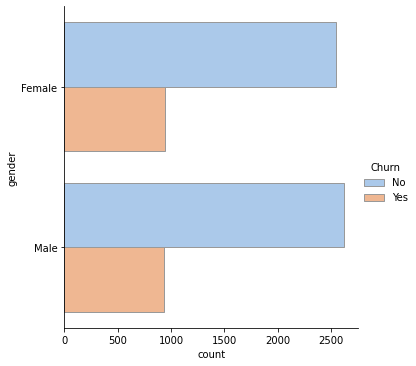

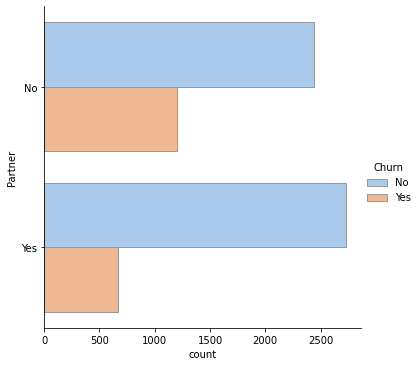

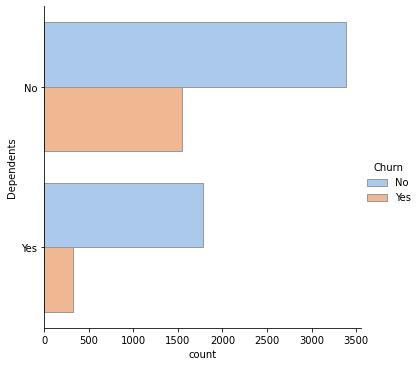

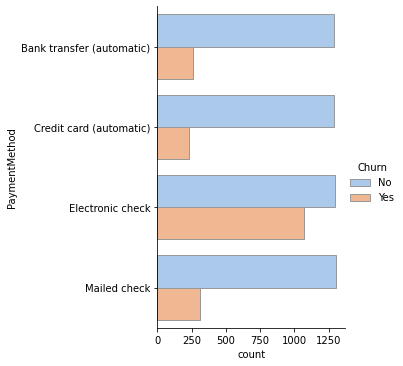

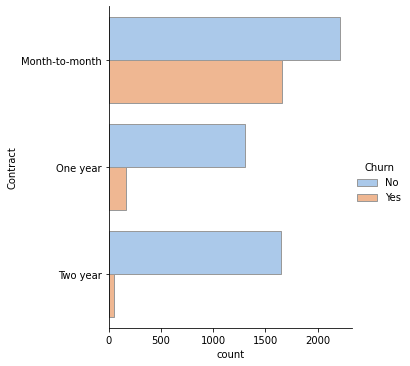

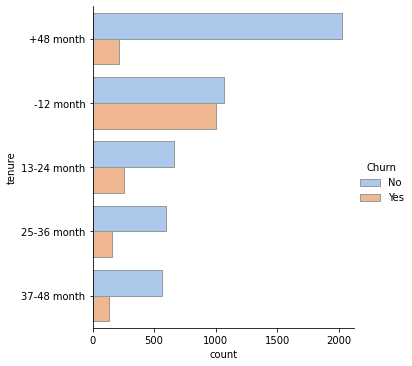

In [651]:
for col in customerchar:
    print(f'\n\nDistribution of {col} by Churn')
    colsns=sns.catplot(y=col, hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
    churn_distribution =round(pd.crosstab(index=df['gender'], columns=df['Churn'], values=df[col], aggfunc=pd.Series.count, margins_name='All', normalize=True), 2)
    display(churn_distribution)

In [652]:
def Churn_category(x):
    churn_category = pd.DataFrame(df.groupby(x)[['Churn']].count())
    #churn_category.reset_index(level=0, inplace=True)
    ax1 = plt.figure(figsize=(8,6))
    plt.bar(churn_category.index, churn_category['Churn'] ,color = ['coral','brown','red'], edgecolor="black", )
    plt.title('Distribution of churn by '+ x,size=12)
    for i in range(len(churn_category['Churn'])):
      plt.text(i,0.1, str(round(churn_category['Churn'].values[i]/df.shape[0], 2))+"%", fontsize =14, horizontalalignment='center', verticalalignment='center')
    return churn_category

,Churn
SeniorCitizen,
No,5901
Yes,1142


,Churn
PhoneService,
No,682
Yes,6361


,Churn
MultipleLines,
No,4072
Yes,2971


,Churn
OnlineSecurity,
No,5024
Yes,2019


,Churn
OnlineBackup,
No,4614
Yes,2429


,Churn
DeviceProtection,
No,4621
Yes,2422


,Churn
TechSupport,
No,4999
Yes,2044


,Churn
StreamingTV,
No,4336
Yes,2707


,Churn
StreamingMovies,
No,4311
Yes,2732


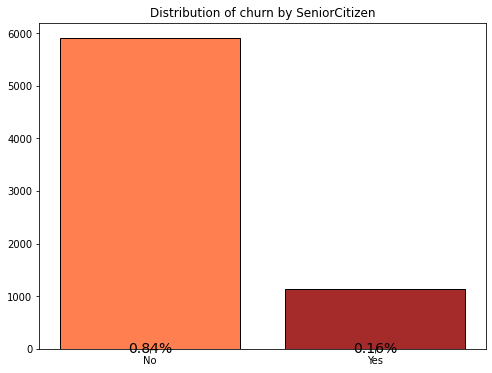

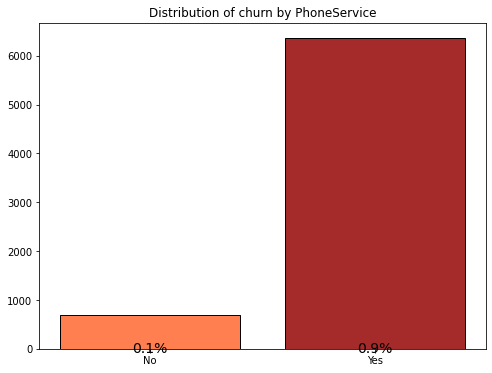

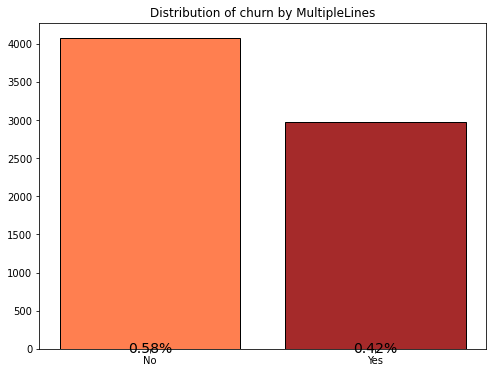

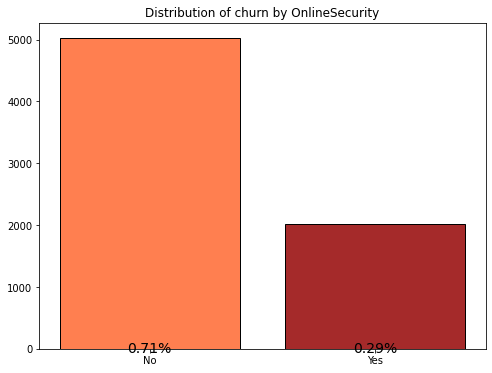

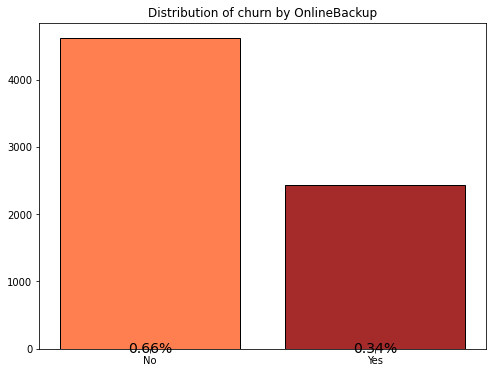

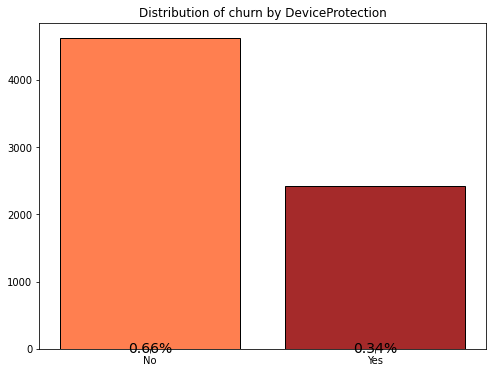

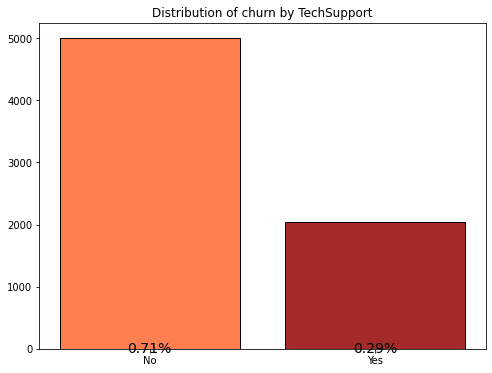

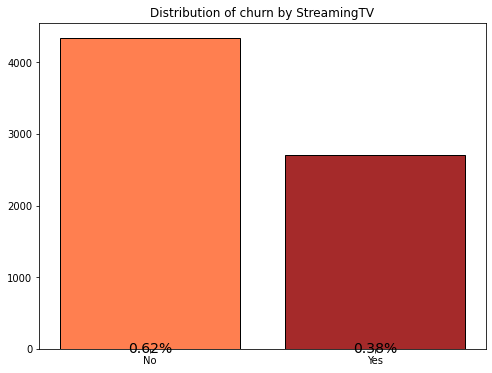

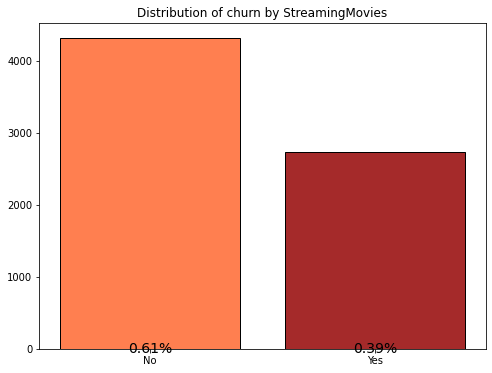

In [679]:
for col in cosservice:
  display(Churn_category(col))

## How much is churn affecting the business

In [680]:
#churn_customer = np.round(df.Churn.value_counts(normalize=True).reset_index(), 2)
#display(churn_customer)
#print(f'\n\n The Telecom company has lost {churn_customer.iloc[1,1]*100}% of his customers during this last month')

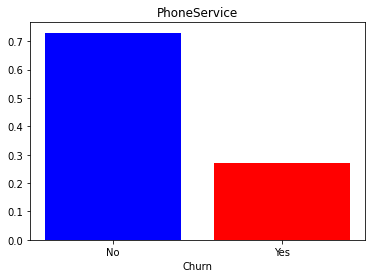

,Churn,%
0,No,0.73
1,Yes,0.27




27.0%  of customers who have purchased PhoneService services move out during the past month




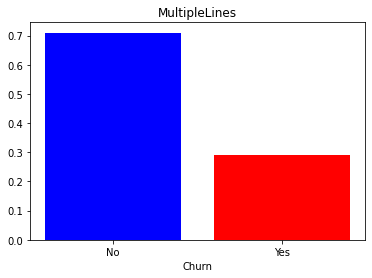

,Churn,%
0,No,0.71
1,Yes,0.29




28.999999999999996%  of customers who have purchased MultipleLines services move out during the past month




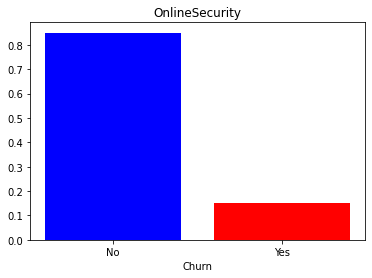

,Churn,%
0,No,0.85
1,Yes,0.15




15.0%  of customers who have purchased OnlineSecurity services move out during the past month




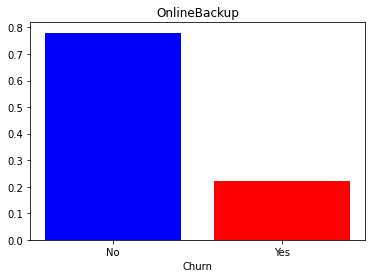

,Churn,%
0,No,0.78
1,Yes,0.22




22.0%  of customers who have purchased OnlineBackup services move out during the past month




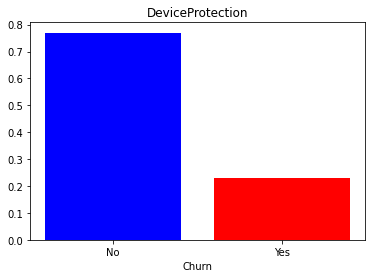

,Churn,%
0,No,0.77
1,Yes,0.23




23.0%  of customers who have purchased DeviceProtection services move out during the past month




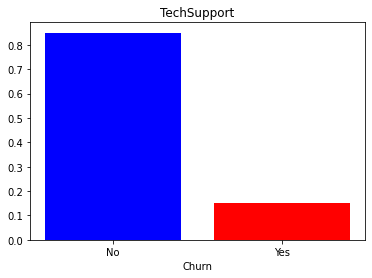

,Churn,%
0,No,0.85
1,Yes,0.15




15.0%  of customers who have purchased TechSupport services move out during the past month




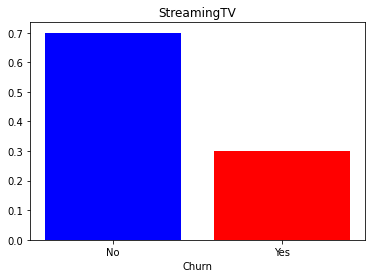

,Churn,%
0,No,0.7
1,Yes,0.3




30.0%  of customers who have purchased StreamingTV services move out during the past month




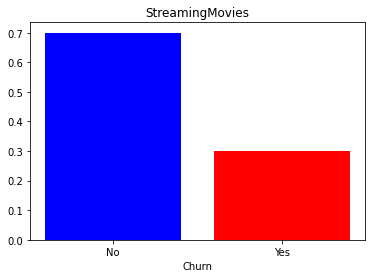

,Churn,%
0,No,0.7
1,Yes,0.3




30.0%  of customers who have purchased StreamingMovies services move out during the past month




pandas.core.frame.DataFrame

In [681]:
services = ['PhoneService', 'MultipleLines',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies',]

df1 = df[services+['MonthlyCharges', 'TotalCharges', 'Churn',]]

# This loop give how each service offered is impacted by the customers who move out
for el in services:
  df1b = df1[df1[el] == "Yes"]["Churn"]
  res = np.round(df1b.value_counts(normalize=True),2)
  plt.bar(res.index, res, color = ["blue", "red"])
  plt.title(el)
  plt.xlabel("Churn")
  plt.savefig(el+"Churn"+".png")
  plt.show()
  res=res.reset_index()
  res = res.rename(columns={"index": "Churn", "Churn": "%"})
  display(res)
  res_yes = res.iloc[1,1]
  print('\n')
  print(f'{res_yes*100}%  of customers who have purchased {el} services move out during the past month')
  print('\n')
type(res)

### How cost churn customer on Telecom company

In [682]:
charges= df[["MonthlyCharges", "TotalCharges", "Churn"]].groupby(by = "Churn").sum("TotalCharges")
charges['Total']=np.sum(charges, axis=1)
charges['Mean']=charges['Total'].mean()
display(charges)
tot_cost=round(charges.iloc[0, 2], 2)
mean_cost=round(charges.iloc[0, 3], 2)
print(f'{tot_cost} : {mean_cost}')

,MonthlyCharges,TotalCharges,Total,Mean
Churn,,,,
No,316985.75,13193241.8,13510227.55,8256142.65
Yes,139130.85,2862926.9,3002057.75,8256142.65


13510227.55 : 8256142.65


In [683]:
mon=df['Churn']=='Yes'
df[mon].TotalCharges.sum()

2862926.9

In [684]:
df['MonthlyCharges'].sum()

456116.6

In [685]:
df['TotalCharges'].sum()

16056168.7

In [687]:
#charges_df = df[["MonthlyCharges", "TotalCharges", "Churn"]].groupby(by = "Churn").sum("TotalCharges")
#display(charges_df.reset_index(inplace=True))

#display(charges_df.MonthlyCharges/sum(charges_df.MonthlyCharges))

In [688]:
#charges_df.MonthlyCharges/sum(charges_df.MonthlyCharges)

In [669]:
churn_by_billing=df[billing].groupby(['Churn']).sum('MonthlyCharges').reset_index()
display(churn_by_billing)

,Churn,MonthlyCharges,TotalCharges
0,No,316985.75,13193241.8
1,Yes,139130.85,2862926.9


In [ ]:
plt.pie(churn_by_billing['TotalCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Total Charges Percentage by Churn")
plt.savefig("Total Charges Percentage by Churn.png")
plt.show()

In [ ]:
plt.pie(churn_by_billing['MonthlyCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Monthly Charges Percentage by Churn")
plt.savefig("Monthly Charges Percentage by Churn.png")
plt.show()

In [ ]:
plt.pie(charges_df['MonthlyCharges'], labels= charges_df.Churn, autopct='%.0f%%')
plt.title("Monthly Charges Percentage by Churn")
plt.savefig("Monthly Charges Percentage by Churn.png")
plt.show()

In [ ]:
plt.pie(charges_df.TotalCharges, labels= charges_df.Churn, autopct='%.0f%%')
plt.title("Distribution of Total Charge by Churn")
plt.savefig("Distribution of Total Charge by Churn.png")
plt.show()

## How big is churn compared to the existing customer base

In [ ]:
churn_yes=df.Churn=="Yes"
yes=df[churn_yes]
yes.head()

In [ ]:
churn_data=np.round(yes.shape[0]/df.shape[0]*100,2)
print(f'Churn customer represent {churn_data}% of in this dataset that means {churn_data}% of customer are churned during the last month')

In [ ]:
yes.columns.to_list()

In [ ]:
churn_costumer_data=yes[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [ ]:
# prob_category(data=df, col='gender', abs_value ="Total",rel_value ="Percent",show_plot=True, title="Gender Distribution")

In [ ]:
df.columns

In [ ]:

def pivo(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='customerID', 
                    index=['Churn'], 
                    columns=x,
                    margins=True,
                    margins_name='All',
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return np.round(new_pivot/df.shape[0]*100,2)

In [ ]:
pivo('SeniorCitizen')

In [ ]:
def piva(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum',
                    margins=True,
                    margins_name='All')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return np.round((new_pivot/sum(df.MonthlyCharges)*100), 2)

In [ ]:
print(f'Distribution in pourcentage of Churn by gender')
display(piva('gender'))
#display(f'Distribution of Churn by gender', piva('gender'))

In [ ]:
sex=piva('gender')
sex.style.background_gradient(cmap ='YlOrRd')

In [ ]:
sex=piva('gender')
sex.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

In [ ]:
def pivcoharges(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='TotalCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum',
                    margins=True)
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return new_pivot

In [ ]:
pivcoharges('gender')

In [ ]:
def pivcoharg(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum',
                    margins=True)
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return new_pivot

In [ ]:
pivcoharg('gender')

In [ ]:
cond = df['Churn']=='Yes'
display(df[cond].head(), df[cond].shape)

In [ ]:
purcharsed_serv=['SeniorCitizen', 'MultipleLines',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies']

In [ ]:
dummies=pd.get_dummies(purcharsed_serv)
dummies

In [ ]:
  pivcoharg('OnlineSecurity').T